In [1]:
import re
import pandas as pd
import numpy as np
import funcs 
import importlib
import unicodecsv as csv
import pickle
import random
import gensim
from gensim import corpora, models
from timeit import default_timer as timer
from datetime import datetime, timedelta
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import spacy
from collections import Counter
import pyLDAvis
import pyLDAvis.gensim
from sklearn.model_selection import train_test_split

importlib.reload(funcs)

<module 'funcs' from 'D:\\_projekty\\praca\\funcs.py'>

In [1]:
dane = pd.read_csv('00_dane/dane_TM.csv',  sep='|', encoding='UTF-8')
dane['speech_rawest'] = dane['speech_rawest'].apply(lambda x: re.sub(r'[\W\d]',' ', x.lower()))
nlp = spacy.load('pl_model')
stop = set(nlp.Defaults.stop_words)
stop.add('zł')
stop.add('pkt')
stop.add('art')
stop.add('ustawy')
stop.add('r')
dane['speech_rawest'] = dane['speech_rawest'].apply(lambda x: [word for word in x.split() if word not in stop])

NameError: name 'pd' is not defined

## Budowa modelu LDS opartego o BOW z optymalnym zestawem parametrów

In [4]:
dictionary = gensim.corpora.Dictionary(dane['speech_rawest'])
dictionary.filter_extremes(no_above=0.1, no_below=50)
BOW = [dictionary.doc2bow(speech) for speech in dane['speech_rawest']]
tfidf = models.TfidfModel(BOW)
corpus_tfidf = tfidf[BOW]

lda_model = gensim.models.LdaMulticore(BOW, id2word=dictionary,num_topics=40, passes=5, workers=2)
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=dane['speech_rawest'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [9]:
a = funcs.print_topics(lda_model.print_topics(-1))
a

,0,1,2,3,4,5,6,7,8,9
Topic 0,wojskowy,obrona,żołnierz,siła,sport,zbrojny,wojsko,sportowy,armia,impreza
Topic 1,cena,produkcja,cen,paliw,akcyza,paliwa,akcyzowy,import,olej,producent
Topic 2,robić,platform,pis,nikt,widzieć,dziać,tyle,iść,pytać,kolega
Topic 3,dziecko,niepełnosprawny,rodzinny,rodzic,rzecznik,dom,opieka,matka,zastępczy,opiekuńczy
Topic 4,przedsiębiorca,firma,przedsiębiorstwo,strefa,instytut,średni,badanie,ekonomiczny,przedsiębiorczość,zamówienie
Topic 5,konstytucja,kościół,konstytucyjny,wolność,naród,referendum,wartość,mniejszość,demokracja,katolicki
Topic 6,nieruchomość,własność,spółdzielnia,grunt,właściciel,majątek,mię,spółdzielczy,skarb,wieczysty
Topic 7,województwo,teren,woj,region,wodny,mieszkaniec,woda,powódź,miasto,pomorski
Topic 8,warszawa,transport,miasto,kolejowy,infrastruktura,kolej,pkp,przewóz,linia,morski
Topic 9,las,energia,odpad,energetyczny,celny,ekologiczny,leśny,woda,naturalny,zasób


In [6]:
coherence_lda

0.6602190876205014

In [10]:
pyLDAvis.enable_notebook()

In [11]:
vis = pyLDAvis.gensim.prepare(lda_model, BOW, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
21     0.100089  0.025892       1        1  10.351459
2      0.224591 -0.105612       2        1   8.049129
17     0.050408  0.197641       3        1   6.619874
10     0.279172 -0.015822       4        1   4.365159
33    -0.099002  0.221374       5        1   4.246898
16     0.232792 -0.074464       6        1   3.482852
11     0.038903  0.224783       7        1   3.103187
12     0.165418 -0.005636       8        1   3.022614
28     0.104386 -0.033895       9        1   2.957175
34    -0.021239  0.151053      10        1   2.859038
25    -0.104478 -0.133994      11        1   2.776850
30     0.052735  0.180055      12        1   2.450186
26    -0.134814  0.056372      13        1   2.399738
32    -0.112588 -0.021282      14        1   2.305847
39    -0.069157 -0.048866      15        1   2.305047
23    -0.083603 -0.108008      16        1   2.304147
35    -0.108290  0.043485      17        1   2.271636
36     0.027081 -0.034713      18        1   2.238912
19     0.009392  0.062286      19        1   2.204627
13    -0.106032 -0.042865      20        1   2.157817
5      0.214450  0.109917      21        1   1.969146
6     -0.101580  0.110149      22        1   1.842719
18     0.023181  0.018803      23        1   1.837713
37    -0.094759  0.128195      24        1   1.726102
3      0.045487 -0.031916      25        1   1.718066
38    -0.150360  0.076858      26        1   1.639505
22    -0.064432 -0.002569      27        1   1.599784
29    -0.075751  0.041614      28        1   1.539596
9     -0.145447 -0.015270      29        1   1.538667
7      0.042223 -0.197955      30        1   1.407293
24    -0.121846 -0.074402      31        1   1.398873
4     -0.039384 -0.161135      32        1   1.291674
31     0.121819  0.004125      33        1   1.153217
20     0.019945  0.052071      34        1   1.139279
1     -0.088659 -0.155339      35        1   1.099022
14    -0.028420 -0.068668      36        1   1.046355
0      0.004372 -0.010474      37        1   1.038018
8     -0.047559 -0.149296      38        1   0.887581
27    -0.060016 -0.166300      39        1   0.878562
15     0.100974 -0.046193      40        1   0.776633, topic_info=             Term          Freq         Total Category  logprob  loglift
1156      dziecko  59474.000000  59474.000000  Default  30.0000  30.0000
5051         bank  46936.000000  46936.000000  Default  29.0000  29.0000
4395        gmina  52188.000000  52188.000000  Default  28.0000  28.0000
127           sąd  50233.000000  50233.000000  Default  27.0000  27.0000
798   konstytucja  41116.000000  41116.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1782      badanie   1430.040161  20156.703125  Topic40  -4.8651   2.2121
1372           in   1029.133911   6889.678223  Topic40  -5.1941   2.9566
3698        równy    992.339111   6454.563477  Topic40  -5.2305   2.9855
3297       lekarz   1060.992188  16705.089844  Topic40  -5.1636   2.1014
1258       metoda    825.736084   7128.662109  Topic40  -5.4143   2.7024

[2867 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
8442      33  0.999474     abonament
8580      33  0.998308  abonamentowy
2005      21  0.030321       aborcja
2005      40  0.969553       aborcja
9110      40  0.998955     aborcyjny
...      ...       ...           ...
3706      29  0.000343       żywność
3706      30  0.008393       żywność
3706      35  0.091975       żywność
3706      36  0.571035       żywność
11340     25  0.997387        żłobek

[20506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 3, 18, 11, 34, 17, 12, 13, 29, 35, 26, 31, 27, 33, 40, 24, 36, 37, 20, 14, 6, 7, 19, 38, 4, 39, 23, 30, 10, 8, 25, 5, 32, 21, 2, 15, 1, 9, 28, 16])

In [26]:
topics_1 = ['wojsko','paliwa','','rodzina','przedsiębiorstwa','państwo','nieruchomości','administracja','transport','środowisko','polityka',
            'prawo','posiedzenie','rozwój','handel','służba zdrowia','historia','posiedzenie','problemy społeczne','administracja','służby','','służba zdrowia',
            'rolnictwo','nieruchomości','ekonomia','podatki','górnictwo','polityka zagraniczna','transport','przestępczość','media','finanse',
            'prawo','administracja','emerytury','edukacja','rynek pracy','bankowość','przedsiębiorstwa']

In [25]:
def format_topics_sentences(ldamodel, corpus, texts):

    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=BOW, texts=dane['speech_rawest'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,30.0,0.2788,"karny, kodeks, kara, przestępstwo, prokurator,...","[chcieć, zdanie, powiedzieć, temat, skutek, us..."
1,1,10.0,0.3844,"prezydent, sld, partia, koalicja, solidarność,...","[przysłuchiwać, emocjonalny, długo, trwać, deb..."
2,2,2.0,0.2708,"robić, platform, pis, nikt, widzieć, dziać, ty...","[różny, przebyć, droga, powiedzieć, swój, ocze..."
3,3,39.0,0.2552,"spółka, prywatyzacja, skarb, przedsiębiorstwo,...","[wszystek, zależeć, uratować, przemysł, stocze..."
4,4,5.0,0.3175,"konstytucja, kościół, konstytucyjny, wolność, ...","[brzmię, punkt, projekt, uchwała, odczytować, ..."
5,5,5.0,0.8606,"konstytucja, kościół, konstytucyjny, wolność, ...","[związek, chcieć, zapytać, sejm, uchwalać, pra..."
6,6,10.0,0.6174,"prezydent, sld, partia, koalicja, solidarność,...","[andrzej, tadeusz, mazurkiewicz, konfederacja,..."
7,7,10.0,0.3908,"prezydent, sld, partia, koalicja, solidarność,...","[parlamentarny, klub, porozumienie, centrum, p..."
8,8,16.0,0.2561,"wojna, historia, pamięć, ii, naród, jan, roczn...","[noc, grudzień, rok, ówczesny, komunistyczny, ..."
9,9,21.0,0.3740,"sądzić, reforma, element, kierunek, zwłaszcza,...","[klub, liberalny, demokratyczny, popierać, pro..."


In [27]:
df_dominant_topic['opis'] = df_dominant_topic['Dominant_Topic'].apply(lambda x: topics_1[int(x)])

In [51]:
pickle.dump(df_dominant_topic, open("topics_LDABOW.p", "wb"))

In [64]:
pickle.dump(lda_model, open("lda_bow_model.p", "wb"))

In [52]:
dane = dane.reset_index()

In [28]:
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,opis
0,0,30.0,0.2788,"karny, kodeks, kara, przestępstwo, prokurator,...","[chcieć, zdanie, powiedzieć, temat, skutek, us...",przestępczość
1,1,10.0,0.3844,"prezydent, sld, partia, koalicja, solidarność,...","[przysłuchiwać, emocjonalny, długo, trwać, deb...",polityka
2,2,2.0,0.2708,"robić, platform, pis, nikt, widzieć, dziać, ty...","[różny, przebyć, droga, powiedzieć, swój, ocze...",
3,3,39.0,0.2552,"spółka, prywatyzacja, skarb, przedsiębiorstwo,...","[wszystek, zależeć, uratować, przemysł, stocze...",przedsiębiorstwa
4,4,5.0,0.3175,"konstytucja, kościół, konstytucyjny, wolność, ...","[brzmię, punkt, projekt, uchwała, odczytować, ...",państwo
5,5,5.0,0.8606,"konstytucja, kościół, konstytucyjny, wolność, ...","[związek, chcieć, zapytać, sejm, uchwalać, pra...",państwo
6,6,10.0,0.6174,"prezydent, sld, partia, koalicja, solidarność,...","[andrzej, tadeusz, mazurkiewicz, konfederacja,...",polityka
7,7,10.0,0.3908,"prezydent, sld, partia, koalicja, solidarność,...","[parlamentarny, klub, porozumienie, centrum, p...",polityka
8,8,16.0,0.2561,"wojna, historia, pamięć, ii, naród, jan, roczn...","[noc, grudzień, rok, ówczesny, komunistyczny, ...",historia
9,9,21.0,0.3740,"sądzić, reforma, element, kierunek, zwłaszcza,...","[klub, liberalny, demokratyczny, popierać, pro...",


In [58]:
dane.head()

,nr,date_,speech_rawer,full_name,party_final,speech_rawest
0,0,01-02-1992,Chciałbym kilka zdań powiedzieć na temat skut...,Aleksander Bentkowski,Polskie Stronnictwo Ludowe,"[chcieć, zdanie, powiedzieć, temat, skutek, us..."
1,1,01-02-1992,"Przysłuchując się tej bardzo emocjonalnej, dł...",Aleksander Kwaśniewski,Sojusz Lewicy Demokratycznej,"[przysłuchiwać, emocjonalny, długo, trwać, deb..."
2,2,01-02-1992,"Różne przebyliśmy drogi, żeby tu dzisiaj powi...",Alojzy Pietrzyk,Klub Parlamentarny NSZZ Solidarność,"[różny, przebyć, droga, powiedzieć, swój, ocze..."
3,3,01-02-1992,"Wszystkim nam bardzo zależy na tym, aby urato...",Alojzy Szablewski,Klub Parlamentarny Zjednoczenia Chrześcijańsko...,"[wszystek, zależeć, uratować, przemysł, stocze..."
4,4,01-02-1992,Z brzmienia pkt. 1 projektu uchwały odczytuję...,Andrzej Baraniecki,Sojusz Lewicy Demokratycznej,"[brzmię, punkt, projekt, uchwała, odczytować, ..."


In [57]:
dane.columns = ['nr', 'date_', 'speech_rawer', 'full_name', 'party_final',
       'speech_rawest']

In [30]:
a = Counter(df_dominant_topic['opis'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

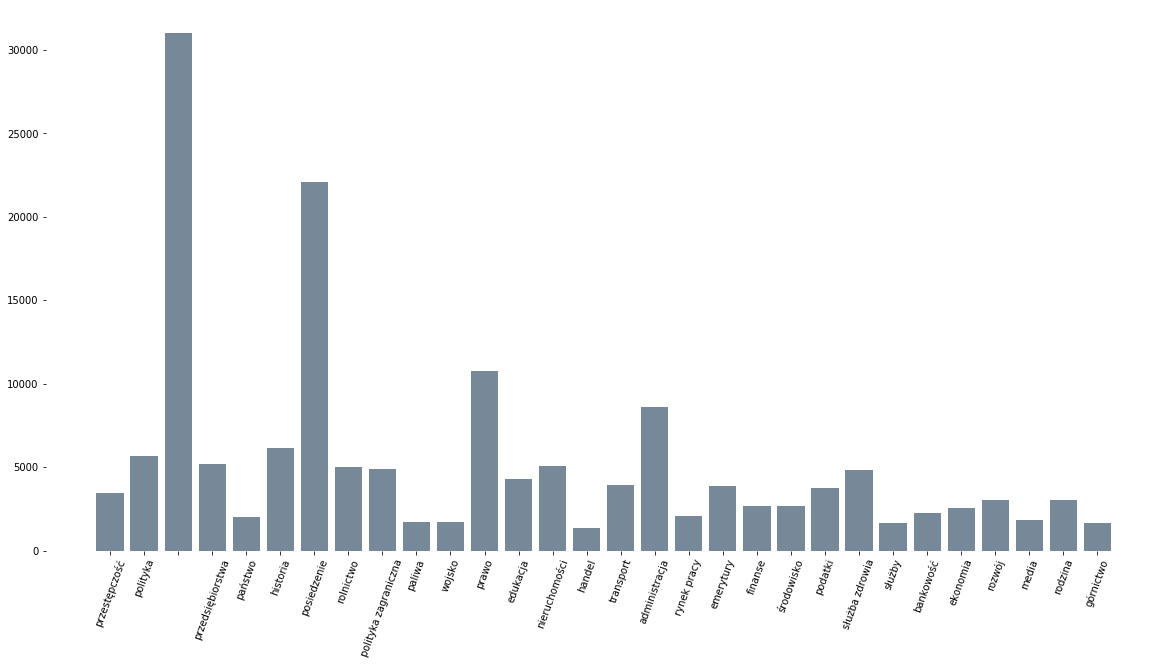

In [48]:
fig = plt.figure(figsize=(20,10))
#color = ["gray"]*len(l_rank.Popularity)
#color[-2]='blue'
bars = plt.bar(list(a.keys()), list(a.values()), align='center', linewidth=0, color='lightslategrey')
plt.box(False)
plt.xticks(rotation=70)


In [59]:
dane['nr_tematu_LDA'] = dane['nr'].apply(lambda x: df_dominant_topic['Dominant_Topic'][x])

In [61]:
dane['opis_tematu_LDA'] = dane['nr_tematu_LDA'].apply(lambda x: topics_1[int(x)])

In [63]:
dane.to_csv('00_dane/dane_TM.csv', sep='|', encoding='UTF-8', index=False)

## Model TF IDF z optymalnymi parametrami

In [ ]:
dictionary = gensim.corpora.Dictionary(dane['speech_rawest'])
dictionary.filter_extremes(no_above=0.1, no_below=50)
BOW = [dictionary.doc2bow(speech) for speech in dane['speech_rawest']]
tfidf = models.TfidfModel(BOW)
corpus_tfidf = tfidf[BOW]

lda_model = gensim.models.LdaMulticore(corpus_tfidf, id2word=dictionary,num_topics=30, passes=10, workers=2)
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=dane['speech_rawest'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(n_a, n_t, pas, coherence_lda)
res = res.append([[n_a, n_t, pas, coherence_lda]], ignore_index=True)

In [66]:
ldatf_model = pickle.load(open("lda_tfidf_model.p", "rb"))

In [67]:
a = funcs.print_topics(ldatf_model.print_topics(-1))
a

,0,1,2,3,4,5,6,7,8,9
Topic 0,przerwa,konwent,regulamin,senior,formalny,głosowanie,porządek,prezydium,obrady,dzienny
Topic 1,prokurator,prokuratura,policja,funkcjonariusz,śledczy,policjant,afera,ipn,śledztwo,generalny
Topic 2,autostrada,inwestycja,kolejowy,morski,wodny,infrastruktura,województwo,transport,budowy,pkp
Topic 3,roślina,gmo,odmiana,genetycznie,pasz,siewny,kibic,tomasz,grzeszczak,eugeniusz
Topic 4,dziecko,kobieta,rodzinny,matka,zasiłek,rodzic,rzecznik,świadczenie,ciąża,aborcja
Topic 5,wyborczy,wybory,ordynacja,amber,gold,okręg,wójt,partia,mandat,burmistrz
Topic 6,senat,nr,rozpatrzyć,lewica,sojusz,rekomendować,ludowy,stronnictwo,legislacyjny,sprawozdawca
Topic 7,górnictwo,górniczy,kopalnia,górnik,geologiczny,węglowy,śląsk,restrukturyzacja,wydobyć,kopalin
Topic 8,karny,konwencja,kara,przestępstwo,ratyfikacja,kodeks,umowa,protokół,międzynarodowy,przestępczość
Topic 9,mieszkaniowy,mieszkanie,budownictwo,budowlany,lokal,przestrzenny,mieszkalny,poczta,budynek,kredyt


In [68]:
vis = pyLDAvis.gensim.prepare(ldatf_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20    -0.233802 -0.094709       1        1  32.936321
16    -0.262094  0.015242       2        1  17.179306
6     -0.292976 -0.089694       3        1   7.464833
10    -0.266377 -0.137836       4        1   7.184515
19    -0.164119  0.067823       5        1   3.094091
25     0.038430 -0.087428       6        1   2.948880
17    -0.032138  0.228790       7        1   2.597982
2     -0.155680  0.140415       8        1   2.502880
13    -0.142948  0.205096       9        1   2.474124
15    -0.186993  0.022265      10        1   2.291955
14    -0.042237  0.050072      11        1   2.072958
8     -0.113908 -0.113576      12        1   1.696633
1      0.015331 -0.135366      13        1   1.486590
4      0.046924 -0.023149      14        1   1.434735
28     0.047966  0.236744      15        1   1.148296
11     0.137882  0.017617      16        1   1.105522
21    -0.001565  0.071947      17        1   1.076079
0     -0.063504 -0.166788      18        1   1.040100
26     0.174390 -0.049527      19        1   0.857863
9      0.097226  0.110464      20        1   0.849727
23     0.155835  0.001183      21        1   0.836647
5      0.102254 -0.048978      22        1   0.817064
7      0.125019  0.084639      23        1   0.755521
18     0.139878 -0.077523      24        1   0.695281
22     0.145314 -0.003519      25        1   0.633802
12     0.153862 -0.043225      26        1   0.590832
3      0.152025 -0.022422      27        1   0.583511
27     0.148747 -0.041812      28        1   0.577992
24     0.144539 -0.052018      29        1   0.561732
29     0.132719 -0.064729      30        1   0.504238, topic_info=                  Term         Freq        Total Category  logprob  loglift
1156           dziecko  1975.000000  1975.000000  Default  30.0000  30.0000
1422          wyborczy  1134.000000  1134.000000  Default  29.0000  29.0000
4834      mieszkaniowy  1081.000000  1081.000000  Default  28.0000  28.0000
752          telewizja  1104.000000  1104.000000  Default  27.0000  27.0000
5924   niepełnosprawny  1013.000000  1013.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
4490       ratyfikacja    89.795868   461.642029  Topic30  -4.1761   3.6526
14820          bierzać    34.542053    45.823338  Topic30  -5.1315   5.0073
8171            ulgowy    36.362812    53.289543  Topic30  -5.0801   4.9077
3429               kpn    37.619652   171.601562  Topic30  -5.0462   3.7722
5044              ulga    36.785275   457.087585  Topic30  -5.0686   2.7701

[1926 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
15988      4  0.136497    abolicja
15988      5  0.019500    abolicja
15988     12  0.818980    abolicja
16062     12  0.921653  abolicyjny
8442      16  0.988085   abonament
...      ...       ...         ...
11340      8  0.013430      żłobek
11340     15  0.040290      żłobek
11340     19  0.067150      żłobek
11340     26  0.805800      żłobek
11340     29  0.053720      żłobek

[6467 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 17, 7, 11, 20, 26, 18, 3, 14, 16, 15, 9, 2, 5, 29, 12, 22, 1, 27, 10, 24, 6, 8, 19, 23, 13, 4, 28, 25, 30])

In [69]:
def format_topics_sentences(ldamodel, corpus, texts):

    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    return(sent_topics_df)

contents = pd.Series(texts)
sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldatf_model, corpus=corpus_tfidf, texts=dane['speech_rawest'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()


# Show


ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

In [81]:
contents = pd.Series(dane['speech_rawest'])
df_dominant_topic = pd.concat([df_dominant_topic, contents], axis=1)

In [73]:
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']

In [82]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,opis,speech_rawest
0,0,10.0,0.4196,"sąd, trybunał, konstytucyjny, konstytucja, sęd...",polityka,"[chcieć, zdanie, powiedzieć, temat, skutek, us..."
1,1,20.0,0.7798,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[przysłuchiwać, emocjonalny, długo, trwać, deb..."
2,2,20.0,0.8955,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[różny, przebyć, droga, powiedzieć, swój, ocze..."
3,3,20.0,0.7282,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[wszystek, zależeć, uratować, przemysł, stocze..."
4,4,20.0,0.4369,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[brzmię, punkt, projekt, uchwała, odczytować, ..."
5,5,10.0,0.6909,"sąd, trybunał, konstytucyjny, konstytucja, sęd...",polityka,"[związek, chcieć, zapytać, sejm, uchwalać, pra..."
6,6,20.0,0.5996,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[andrzej, tadeusz, mazurkiewicz, konfederacja,..."
7,7,20.0,0.6638,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[parlamentarny, klub, porozumienie, centrum, p..."
8,8,20.0,0.4094,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[noc, grudzień, rok, ówczesny, komunistyczny, ..."
9,9,20.0,0.7730,"prezydent, europa, robić, wypowiedź, konstytuc...",służby,"[klub, liberalny, demokratyczny, popierać, pro..."


In [75]:
topics_2 = ['posiedzenie','policja','transport','rolnictwo','rodzina','wybory','posiedzenie','górnictwo','przestępczość','nieruchomości',
            'sądy','media','rybołówstwo','przedsiębiorstwa','edukacja','administracja','bankowość','rolnictwo','kombatanci','służba zdrowia',
            'polityka','transport','','środowisko','rekreacja','wojsko','','alkohol','cukier','']


In [76]:
dane['nr_tematu_LDA_TF'] = dane['nr'].apply(lambda x: df_dominant_topic['Dominant_Topic'][x])

In [77]:
dane['opis_tematu_LDA_TF'] = dane['nr_tematu_LDA_TF'].apply(lambda x: topics_2[int(x)])

In [78]:
dane.to_csv('00_dane/dane_TM.csv', sep='|', encoding='UTF-8', index=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text xticklabel objects>)

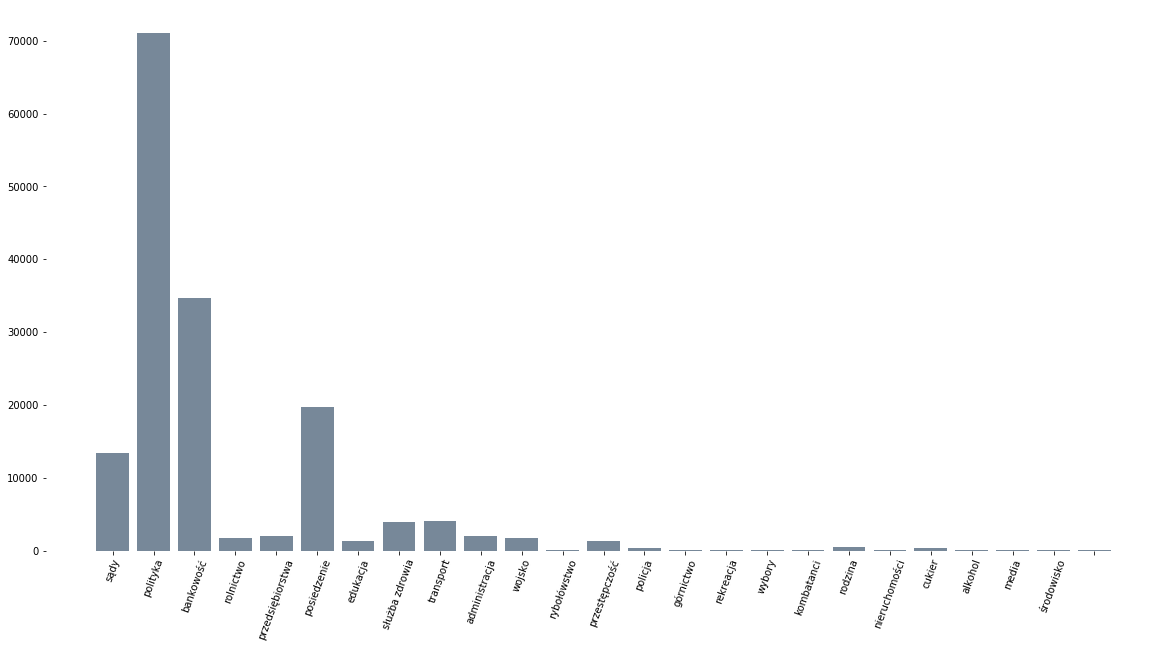

In [83]:
df_dominant_topic['opis'] = df_dominant_topic['Dominant_Topic'].apply(lambda x: topics_2[int(x)])
a = Counter(df_dominant_topic['opis'])
fig = plt.figure(figsize=(20,10))
#color = ["gray"]*len(l_rank.Popularity)
#color[-2]='blue'
bars = plt.bar(list(a.keys()), list(a.values()), align='center', linewidth=0, color='lightslategrey')
plt.box(False)
plt.xticks(rotation=70)

In [84]:
dane.head()

,nr,date_,speech_rawer,full_name,party_final,speech_rawest,nr_tematu_LDA,opis_tematu_LDA,nr_tematu_LDA_TF,opis_tematu_LDA_TF
0,0,01-02-1992,Chciałbym kilka zdań powiedzieć na temat skut...,Aleksander Bentkowski,Polskie Stronnictwo Ludowe,"[chcieć, zdanie, powiedzieć, temat, skutek, us...",30.0,przestępczość,10.0,sądy
1,1,01-02-1992,"Przysłuchując się tej bardzo emocjonalnej, dł...",Aleksander Kwaśniewski,Sojusz Lewicy Demokratycznej,"[przysłuchiwać, emocjonalny, długo, trwać, deb...",10.0,polityka,20.0,polityka
2,2,01-02-1992,"Różne przebyliśmy drogi, żeby tu dzisiaj powi...",Alojzy Pietrzyk,Klub Parlamentarny NSZZ Solidarność,"[różny, przebyć, droga, powiedzieć, swój, ocze...",2.0,,20.0,polityka
3,3,01-02-1992,"Wszystkim nam bardzo zależy na tym, aby urato...",Alojzy Szablewski,Klub Parlamentarny Zjednoczenia Chrześcijańsko...,"[wszystek, zależeć, uratować, przemysł, stocze...",39.0,przedsiębiorstwa,20.0,polityka
4,4,01-02-1992,Z brzmienia pkt. 1 projektu uchwały odczytuję...,Andrzej Baraniecki,Sojusz Lewicy Demokratycznej,"[brzmię, punkt, projekt, uchwała, odczytować, ...",5.0,państwo,20.0,polityka
